### RANDOM FOREST :

### Objective :
* Data Loading
* Data Understanding
* Data Cleaning
* Data Pre-Processing
* Data Visualization
* Building Random Forest Model

### DATA SET : BRAIN-STROKE

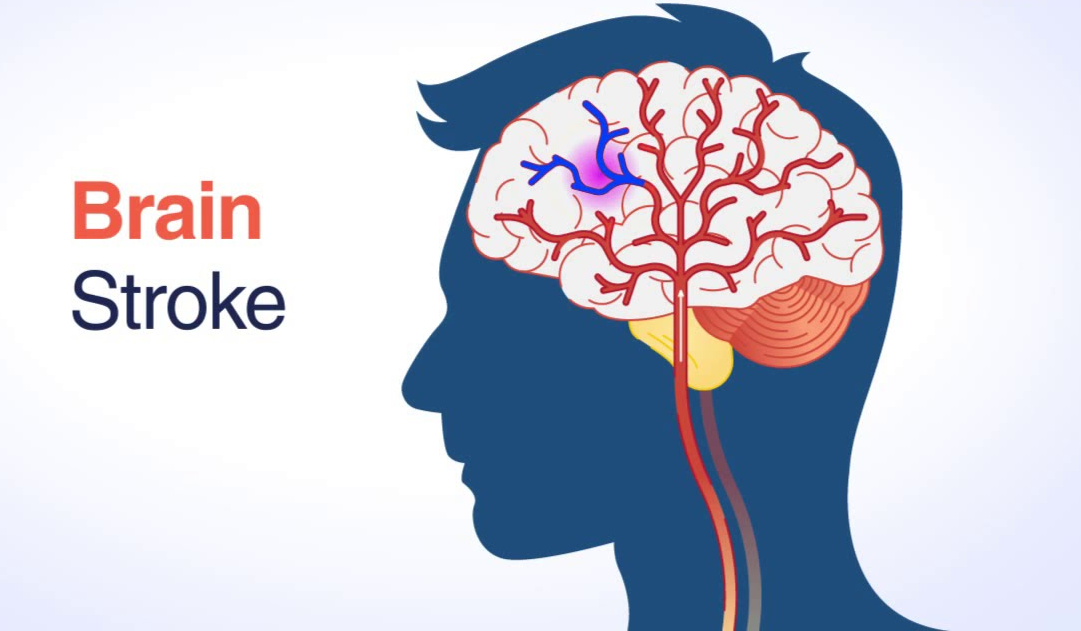

| Variable               | Description                                                                                        |
| -------------          | ---------------------------------------------------------------------------------------------------|
|gender                  |gender of the person                                                                                | 
|age                     |person's age                                                                                        |
|hypertension            |has hypertension(1) no hypertension(0)                                                              |
|hearth_disease          |has hearth disease(1) no hearthdisease(0)                                                           |
|ever_married            |has she/he ever been married Yes(1) No(0)                                                           |
|work_type               |work type                                                                                           |
|Residence_type          |residence type                                                                                      |
|avg_glucose_level       |average glucose level                                                                               |
|bmi                     |body mass index                                                                                     |
|smoking_status          |how often does she/he smoke                                                                         |
|stroke                  |Yes(1) No(0)                                                                                        |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Importing the Data set :

In [3]:
df=pd.read_csv('brainstroke.csv')

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Viewing the Data :

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Shape of the DataFrame :

In [6]:
print("shape of the Data :",df.shape)
print("No of Rows        :", df.shape[0])
print("No of Columns     :",df.shape[1])

shape of the Data : (4981, 11)
No of Rows        : 4981
No of Columns     : 11


Viewing the Data Types :

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Viewing the Info :

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


We see that there are no null values in the given data set

In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


We see that hypertension,heart_disease,stroke comes under the categorical variables.

Univariate Analysis :

Consider the Object columns :

In [10]:
objcols=df.select_dtypes('object')
objcols=pd.concat([objcols,df[['hypertension','heart_disease']]],axis=1)
objcols.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,Male,Yes,Private,Urban,formerly smoked,0,1
1,Male,Yes,Private,Rural,never smoked,0,1
2,Female,Yes,Private,Urban,smokes,0,0
3,Female,Yes,Self-employed,Rural,never smoked,1,0
4,Male,Yes,Private,Urban,formerly smoked,0,0


In [11]:
for i in objcols.columns :
    print(i,'has',df[i].nunique(),'levels')
    print('Values are :',df[i].unique())
    print('----------------------------------------------------------------')

gender has 2 levels
Values are : ['Male' 'Female']
----------------------------------------------------------------
ever_married has 2 levels
Values are : ['Yes' 'No']
----------------------------------------------------------------
work_type has 4 levels
Values are : ['Private' 'Self-employed' 'Govt_job' 'children']
----------------------------------------------------------------
Residence_type has 2 levels
Values are : ['Urban' 'Rural']
----------------------------------------------------------------
smoking_status has 4 levels
Values are : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
----------------------------------------------------------------
hypertension has 2 levels
Values are : [0 1]
----------------------------------------------------------------
heart_disease has 2 levels
Values are : [1 0]
----------------------------------------------------------------


Viewing the Value counts for the object columns :

In [12]:
for i in objcols.columns :
    print(i,'\n')
    print(df[i].value_counts(dropna=False))
    print("----------------------------------------")

gender 

Female    2907
Male      2074
Name: gender, dtype: int64
----------------------------------------
ever_married 

Yes    3280
No     1701
Name: ever_married, dtype: int64
----------------------------------------
work_type 

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
----------------------------------------
Residence_type 

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
----------------------------------------
smoking_status 

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
----------------------------------------
hypertension 

0    4502
1     479
Name: hypertension, dtype: int64
----------------------------------------
heart_disease 

0    4706
1     275
Name: heart_disease, dtype: int64
----------------------------------------


We can see that there are no duplicate levels for the object columns.

In [13]:
# Here we are removing the spaces in the "smoking_status" column :
df.smoking_status.replace(['never smoked','formerly smoked'],['never_smoked','formerly_smoked'],inplace=True)
df.smoking_status.value_counts(dropna=False)

never_smoked       1838
Unknown            1500
formerly_smoked     867
smokes              776
Name: smoking_status, dtype: int64

Numeric columns :

In [14]:
numcols=df.select_dtypes(np.number)
numcols.drop(['hypertension','heart_disease','stroke'],axis=1,inplace=True)
numcols.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0


In [15]:
numcols.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


We can see that the Mean and the Median values are somewhat closer to each other implies that there are no outliers.

Checking for the Outliers :

To Identify the Outliers we will draw Box_plots :

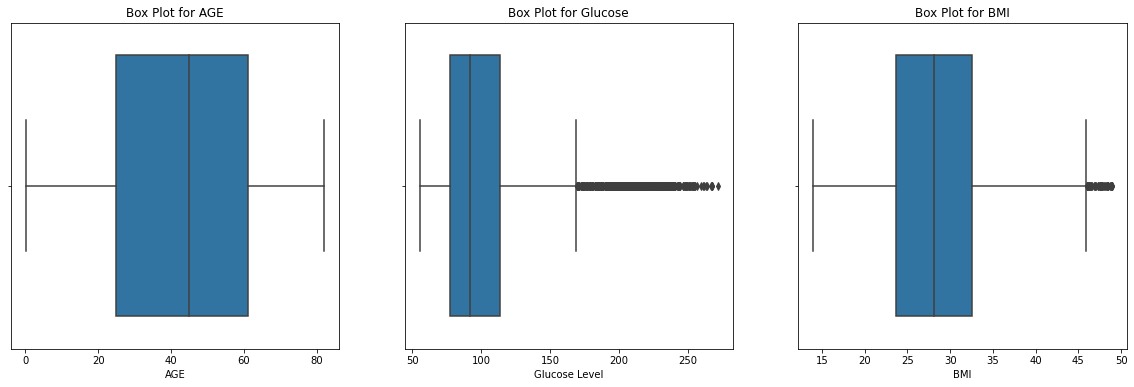

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df.age)
plt.xlabel('AGE')
plt.title('Box Plot for AGE')

plt.subplot(1,3,2)
sns.boxplot(df.avg_glucose_level)
plt.xlabel('Glucose Level')
plt.title('Box Plot for Glucose')

plt.subplot(1,3,3)
sns.boxplot(df.bmi)
plt.xlabel('BMI')
plt.title('Box Plot for BMI')

plt.show()

We see that there are no outliers for AGE and some outliers for Glucose level and BMI

Checking the Null Values :

In [17]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no Null Values for the DataSet.

Visualizing the Data :

In [18]:
# Value Counts for the Target-Variable :
df.stroke.value_counts(dropna=False)

0    4733
1     248
Name: stroke, dtype: int64

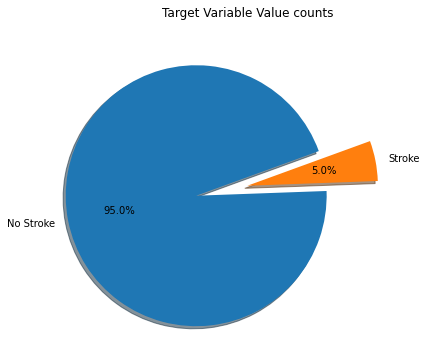

In [19]:
plt.figure(figsize=(9,6))
plt.pie(df.stroke.value_counts(),startangle=20,explode=[0.4,0],shadow=True,
        labels=['No Stroke','Stroke'],autopct='%1.1f%%')
plt.title("Target Variable Value counts")
plt.show()

We can see that the given data is highly imbalanced. So , we need to apply the Sampling Techniques i.e., OverSampling or UnderSampling.

Let's divide our Data in to two sets who are having stroke and or not.

In [20]:
stroke=df[df.stroke==1]
nostroke=df[df.stroke==0]
print("stroke   :",stroke.shape)
print("Nostroke :",nostroke.shape)

stroke   : (248, 11)
Nostroke : (4733, 11)


In [21]:
objcols.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'hypertension', 'heart_disease'],
      dtype='object')

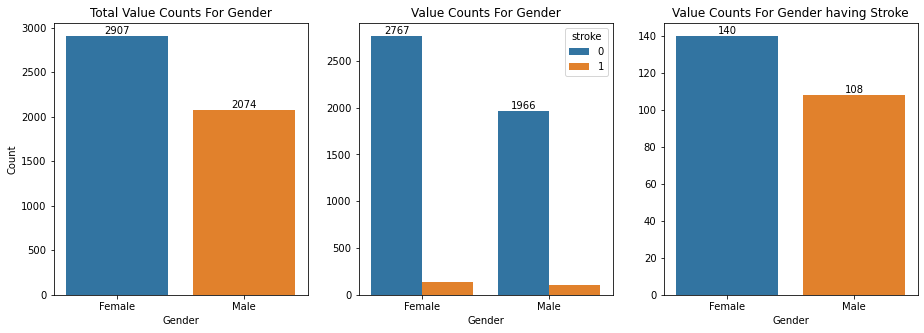

In [22]:
# Let's start with Gender :
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
ax=sns.countplot('gender',order=df.gender.value_counts().index,data=df)
abs_values=df.gender.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Total Value Counts For Gender")
plt.xlabel('Gender')
plt.ylabel("Count")

plt.subplot(1,3,2)
ax=sns.countplot('gender',order=df.gender.value_counts().index,hue='stroke',data=df)
abs_values=nostroke.gender.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Gender")
plt.xlabel('Gender')
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot('gender',order=df.gender.value_counts().index,data=stroke)
abs_values=stroke.gender.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Gender having Stroke")
plt.xlabel('Gender')
plt.ylabel("")

plt.subplots_adjust(right=2,left=0.8)
plt.show()

We can see that Female count is higher in both the Total and who are having stroke for the given Data.

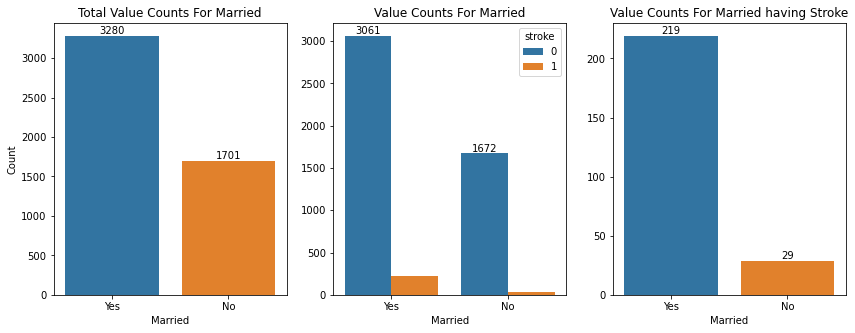

In [23]:
# Ever_Married
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
ax=sns.countplot('ever_married',order=df.ever_married.value_counts().index,data=df)
abs_values=df.ever_married.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Total Value Counts For Married")
plt.xlabel('Married')
plt.ylabel("Count")

plt.subplot(1,3,2)
ax=sns.countplot('ever_married',order=df.ever_married.value_counts().index,hue='stroke',data=df)
abs_values=nostroke.ever_married.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Married")
plt.xlabel('Married')
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot('ever_married',order=df.ever_married.value_counts().index,data=stroke)
abs_values=stroke.ever_married.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Married having Stroke")
plt.xlabel('Married')
plt.ylabel("")

plt.subplots_adjust(right=1.8,left=0.7)
plt.show()

We see that most of them are married for both the Total and who are having stroke

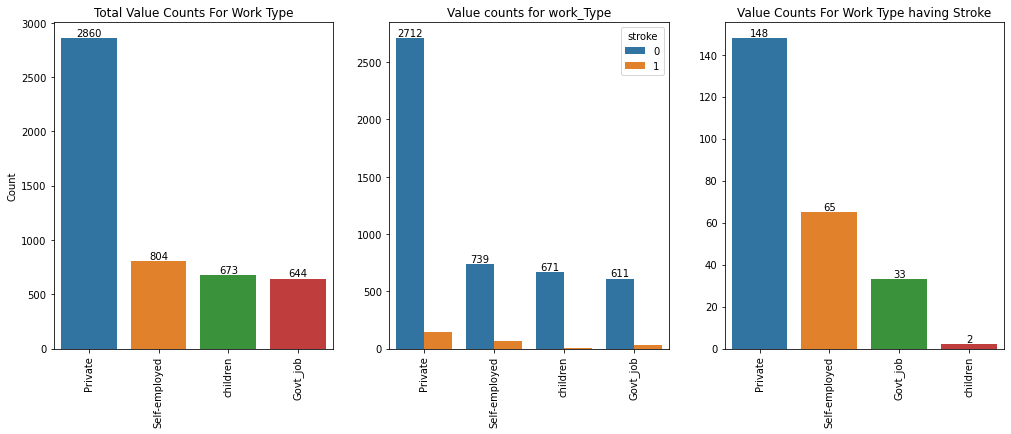

In [24]:
# Work-Type :
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
ax=sns.countplot('work_type',order=df.work_type.value_counts().index,data=df)
abs_values=df.work_type.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Total Value Counts For Work Type")
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel("Count")

plt.subplot(1,3,2)
ax=sns.countplot('work_type',order=df.work_type.value_counts().index,hue='stroke',data=df)
abs_values=nostroke.work_type.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value counts for work_Type")
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot('work_type',order=stroke.work_type.value_counts().index,data=stroke)
abs_values=stroke.work_type.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Work Type having Stroke")
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel("")

plt.subplots_adjust(right=2,left=0.9)
plt.show()

We see that most of them are workin private for both the Total and who are having stroke.

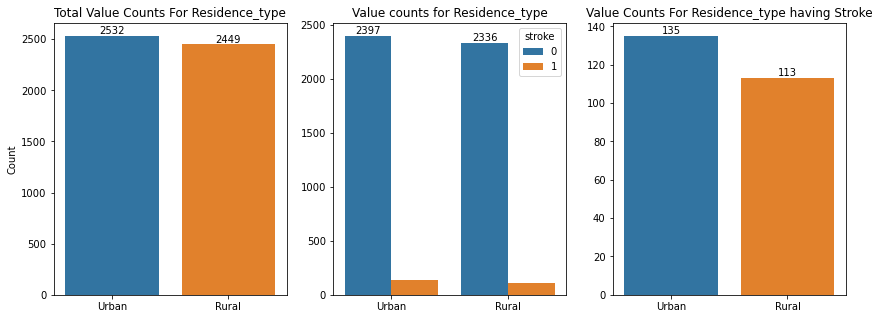

In [25]:
# Residence_type :
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
ax=sns.countplot('Residence_type',order=df.Residence_type.value_counts().index,data=df)
abs_values=df.Residence_type.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Total Value Counts For Residence_type")
plt.xlabel('')
plt.ylabel("Count")

plt.subplot(1,3,2)
ax=sns.countplot('Residence_type',order=df.Residence_type.value_counts().index,hue='stroke',data=df)
abs_values=nostroke.Residence_type.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value counts for Residence_type")
plt.xlabel('')
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot('Residence_type',order=stroke.Residence_type.value_counts().index,data=stroke)
abs_values=stroke.Residence_type.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Residence_type having Stroke")
plt.xlabel('')
plt.ylabel("")

plt.subplots_adjust(right=2,left=0.9)
plt.show()

We see that there is no significant difference in the counts for the Region for both the Total and who are having stroke.

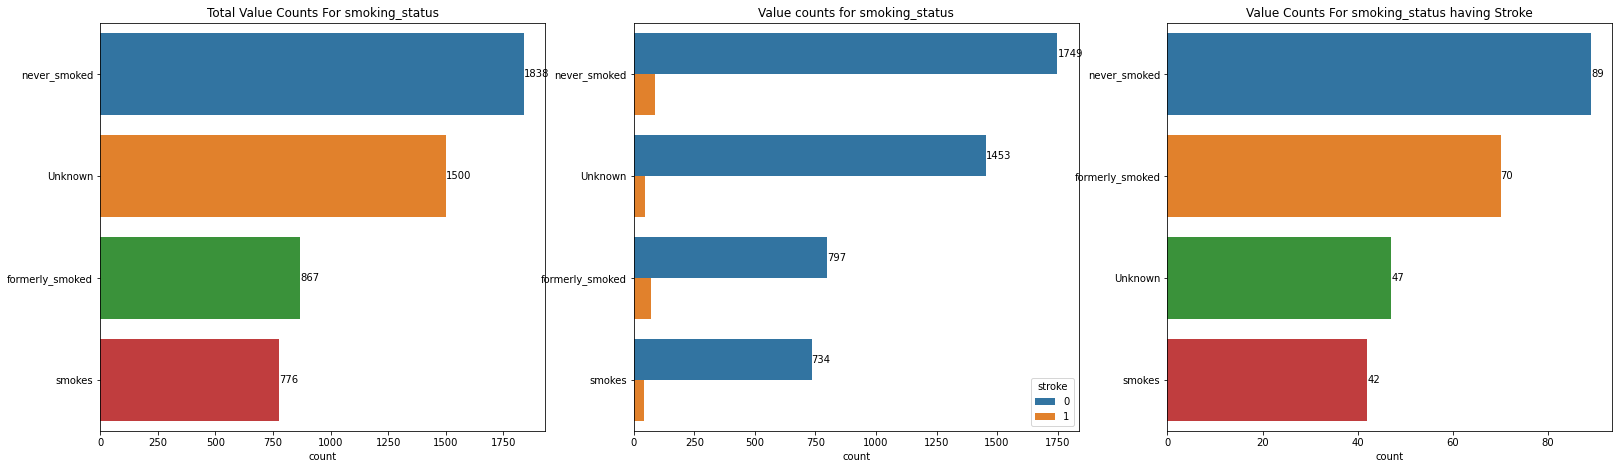

In [26]:
#smoking_status :
plt.figure(figsize=(14,7.5))
plt.subplot(1,3,1)
ax=sns.countplot(y='smoking_status',order=df.smoking_status.value_counts().index,data=df)
abs_values=df.smoking_status.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Total Value Counts For smoking_status")
plt.ylabel("")

plt.subplot(1,3,2)
ax=sns.countplot(y='smoking_status',order=df.smoking_status.value_counts().index,hue='stroke',data=df)
abs_values=nostroke.smoking_status.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value counts for smoking_status")
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot(y='smoking_status',order=stroke.smoking_status.value_counts().index,data=stroke)
abs_values=stroke.smoking_status.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For smoking_status having Stroke")
plt.ylabel("")

plt.subplots_adjust(right=2.5,left=1)
plt.show()

we see that most of them are Never-Smoking members from both the Total and who are having stroke

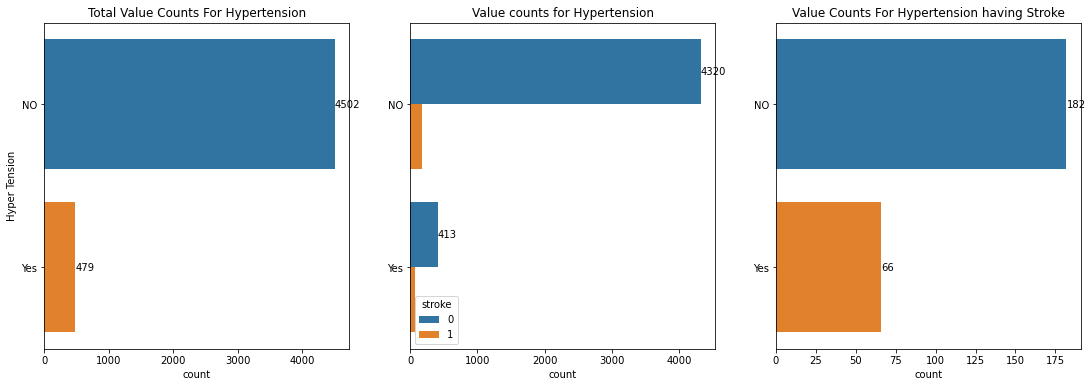

In [27]:
# hypertension :
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
ax=sns.countplot(y='hypertension',order=df.hypertension.value_counts().index,data=df)
abs_values=df.hypertension.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Total Value Counts For Hypertension")
plt.yticks([0,1],['NO','Yes'])
plt.ylabel("Hyper Tension")

plt.subplot(1,3,2)
ax=sns.countplot(y='hypertension',order=df.hypertension.value_counts().index,hue='stroke',data=df)
abs_values=nostroke.hypertension.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value counts for Hypertension")
plt.yticks([0,1],['NO','Yes'])
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot(y='hypertension',order=stroke.hypertension.value_counts().index,data=stroke)
abs_values=stroke.hypertension.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Hypertension having Stroke")
plt.yticks([0,1],['NO','Yes'])
plt.ylabel('')

plt.subplots_adjust(right=2,left=0.8)
plt.show()

we see that most of them are not having HyperTension for both the Total and who are having stroke

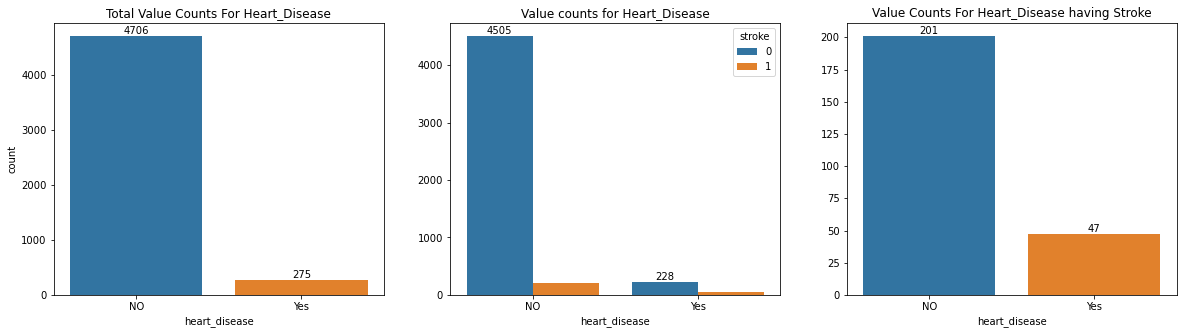

In [28]:
# heart_disease :
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
ax=sns.countplot('heart_disease',order=df.heart_disease.value_counts().index,data=df)
abs_values=df.heart_disease.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Total Value Counts For Heart_Disease")
plt.xticks([0,1],['NO','Yes'])
plt.ylabel("count")

plt.subplot(1,3,2)
ax=sns.countplot('heart_disease',order=df.heart_disease.value_counts().index,hue='stroke',data=df)
abs_values=nostroke.heart_disease.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value counts for Heart_Disease")
plt.xticks([0,1],['NO','Yes'])
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot('heart_disease',order=stroke.heart_disease.value_counts().index,data=stroke)
abs_values=stroke.heart_disease.value_counts().values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title("Value Counts For Heart_Disease having Stroke")
plt.xticks([0,1],['NO','Yes'])
plt.ylabel('')

plt.subplots_adjust(right=2,left=0.7)
plt.show()

We see that most of them are not having Heart_Disease for both the Total and who are having stroke.

In [29]:
numcols.columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

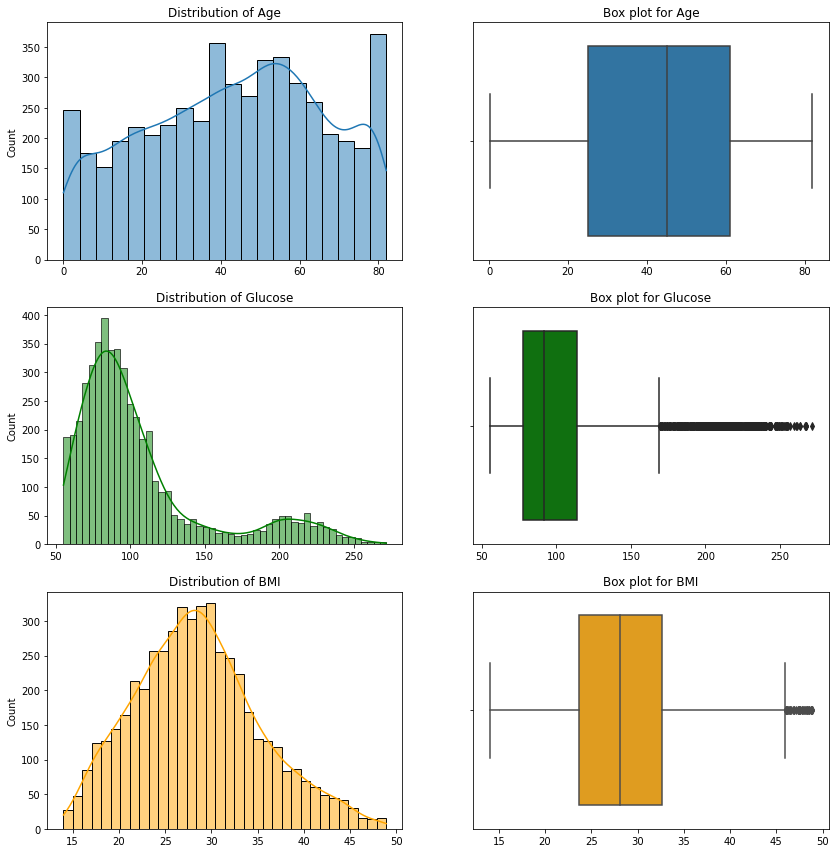

In [30]:
# Numeric columns :
plt.figure(figsize=(14,8))
plt.subplot(3,2,1)
sns.histplot(df.age,kde=True)
plt.title("Distribution of Age")
plt.xlabel('')

plt.subplot(3,2,2)
sns.boxplot(df.age)
plt.title("Box plot for Age")
plt.xlabel('')

plt.subplot(3,2,3)
sns.histplot(df.avg_glucose_level,kde=True,color='g')
plt.title('Distribution of Glucose')
plt.xlabel('')

plt.subplot(3,2,4)
sns.boxplot(df.avg_glucose_level,color='g')
plt.title("Box plot for Glucose")
plt.xlabel('')

plt.subplot(3,2,5)
sns.histplot(df.bmi,kde=True,color='orange')
plt.title('Distribution of BMI')
plt.xlabel('')

plt.subplot(3,2,6)
sns.boxplot(df.bmi,color='orange')
plt.title('Box plot for BMI')
plt.xlabel('')

plt.subplots_adjust(top=2.2,bottom=0.8)
plt.show()


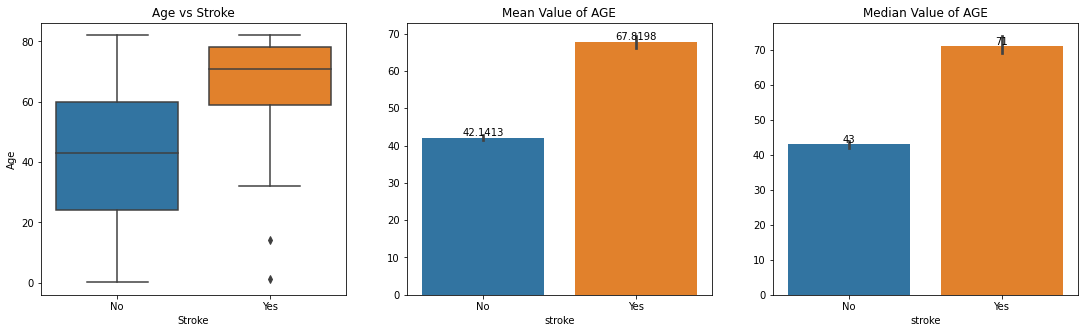

In [31]:
# Age Vs Stroke :
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.stroke,y=df.age)
plt.title('Age vs Stroke')
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Stroke")
plt.ylabel("Age")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,y='age',x='stroke',estimator=np.mean)
plt.title("Mean Value of AGE")
plt.xticks([0,1],['No','Yes'])
fig.bar_label(fig.containers[0])
plt.ylabel('')

plt.subplot(1,3,3)
fig=sns.barplot(data=df,y='age',x='stroke',estimator=np.median)
plt.title("Median Value of AGE")
plt.xticks([0,1],['No','Yes'])
fig.bar_label(fig.containers[0])
plt.ylabel('')

plt.subplots_adjust(right=2,left=0.8)
plt.show()

We see that for those who are having stroke their Age is high(old age)  and there are two cases their age is small may be they are the children.

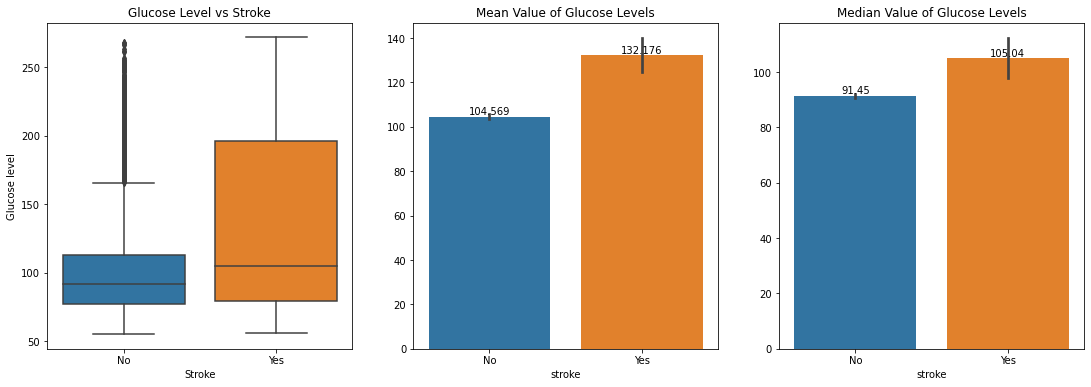

In [32]:
# Glucose Level Vs Stroke
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.stroke,y=df.avg_glucose_level)
plt.title('Glucose Level vs Stroke')
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Stroke")
plt.ylabel("Glucose level")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,y='avg_glucose_level',x='stroke',estimator=np.mean)
plt.title("Mean Value of Glucose Levels")
plt.xticks([0,1],['No','Yes'])
fig.bar_label(fig.containers[0])
plt.ylabel('')

plt.subplot(1,3,3)
fig=sns.barplot(data=df,y='avg_glucose_level',x='stroke',estimator=np.median)
plt.title("Median Value of Glucose Levels")
plt.xticks([0,1],['No','Yes'])
fig.bar_label(fig.containers[0])
plt.ylabel('')

plt.subplots_adjust(right=2,left=0.8)
plt.show()

we see that for those whose are not effected by stroke 75% of the data lies below the 125 (approx) level and for those who are effected 75% of Data lies below 175th level. 

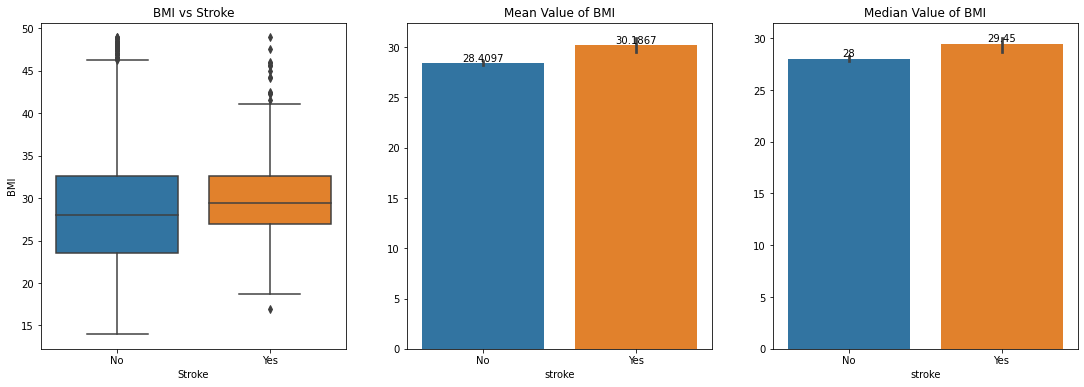

In [33]:
# BMI vs Stroke :
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.stroke,y=df.bmi)
plt.title('BMI vs Stroke')
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Stroke")
plt.ylabel("BMI")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,y='bmi',x='stroke',estimator=np.mean)
plt.title("Mean Value of BMI")
plt.xticks([0,1],['No','Yes'])
fig.bar_label(fig.containers[0])
plt.ylabel('')

plt.subplot(1,3,3)
fig=sns.barplot(data=df,y='bmi',x='stroke',estimator=np.median)
plt.title("Median Value of BMI")
plt.xticks([0,1],['No','Yes'])
fig.bar_label(fig.containers[0])
plt.ylabel('')

plt.subplots_adjust(right=2,left=0.8)
plt.show()

There is no significant difference in the distributions of BMI for those who are having stroke or not.

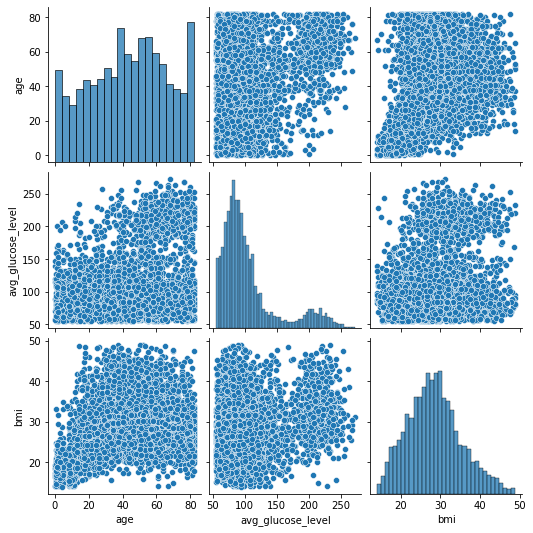

In [34]:
# Pair plot for Numeric columns :
sns.pairplot(numcols)
plt.show()

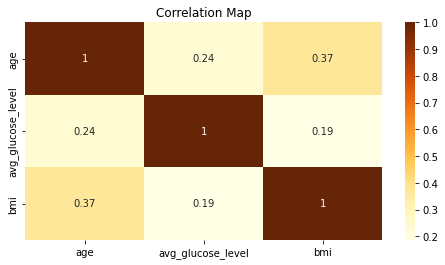

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(numcols.corr(),annot=True,cmap='YlOrBr')
plt.title("Correlation Map")
plt.show()

We see that there is no high correlation between the Variables.

In [36]:
# checking the object columns levels :
for i in objcols.columns :
    print(i,'has',df[i].nunique(),'levels')
    print('Values are :',df[i].unique())
    print('----------------------------')

gender has 2 levels
Values are : ['Male' 'Female']
----------------------------
ever_married has 2 levels
Values are : ['Yes' 'No']
----------------------------
work_type has 4 levels
Values are : ['Private' 'Self-employed' 'Govt_job' 'children']
----------------------------
Residence_type has 2 levels
Values are : ['Urban' 'Rural']
----------------------------
smoking_status has 4 levels
Values are : ['formerly_smoked' 'never_smoked' 'smokes' 'Unknown']
----------------------------
hypertension has 2 levels
Values are : [0 1]
----------------------------
heart_disease has 2 levels
Values are : [1 0]
----------------------------


We see that the columns 'gender','ever_married','Residence_type' are having two levels so we use the Binary map 

In [37]:
df.gender=df.gender.map({'Male':1,'Female':0})
df.ever_married=df.ever_married.map({'Yes':1,'No':0})
df.Residence_type=df.Residence_type.map({'Urban':1,'Rural':0})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly_smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never_smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never_smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly_smoked,1


In [38]:
# Now we will create the dummy variables for the 'work_type','smoking_status'  columns :
dummy=pd.get_dummies(df[['work_type','smoking_status']])
dummy.head()

,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0,0


In [39]:
dummy.shape

(4981, 8)

In [40]:
dummy.sum().sort_values(ascending=True)

work_type_Govt_job                 644
work_type_children                 673
smoking_status_smokes              776
work_type_Self-employed            804
smoking_status_formerly_smoked     867
smoking_status_Unknown            1500
smoking_status_never_smoked       1838
work_type_Private                 2860
dtype: int64

We can see that the value counts for the columns 'work_type_Govt_job','smoking_status_smokes' is low so we can use them as reference columns.

Concatinating the Dummy variables to the original and dropping the original columns :

In [41]:
print("Before concatinating shape is :",df.shape)
dfnl=pd.concat([df,dummy],axis=1)
print("After  concatinating shape is :",dfnl.shape)

Before concatinating shape is : (4981, 11)
After  concatinating shape is : (4981, 19)


In [42]:
# Dropping the original columns and reference columns to avoid Multicollinearity :
cols=['work_type','smoking_status','work_type_Govt_job','smoking_status_smokes']
print("Before Dropping :",dfnl.shape)
dfnl.drop(cols,axis=1,inplace=True)
print("After Dropping :",dfnl.shape)

Before Dropping : (4981, 19)
After Dropping : (4981, 15)


Extracting the X and y :

In [43]:
dfnl.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked'],
      dtype='object')

In [44]:
X=dfnl.drop('stroke',axis=1)
y=dfnl.stroke
print("X shape :",X.shape)
print("y shape :",y.shape)

X shape : (4981, 14)
y shape : (4981,)


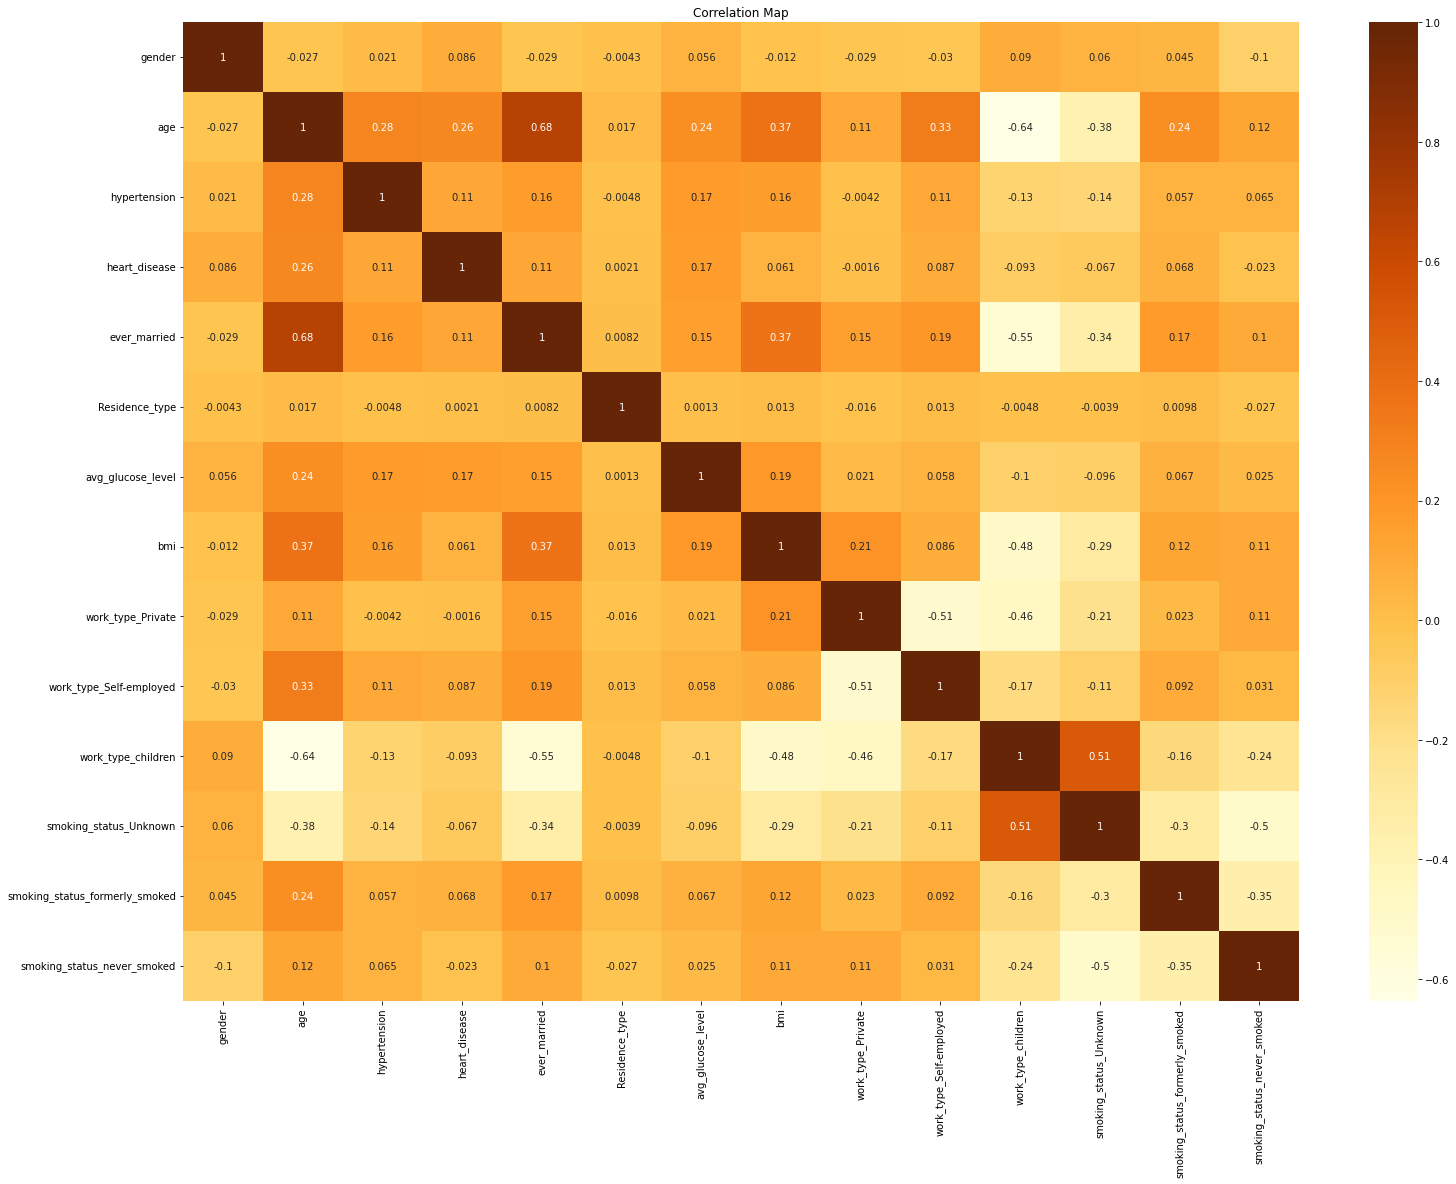

In [45]:
plt.figure(figsize=(25,18))
sns.heatmap(X.corr(),
           cmap='YlOrBr', annot=True)
plt.title("Correlation Map")
plt.show()

      --------------------------------------------------------------------------------------------------------------

Train-Test split :

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [47]:
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (3984, 14)
y_train shape : (3984,)
X_test shape : (997, 14)
y_test shape : (997,)


Building the Base Model using all the Variables :

Random Forest Model :

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier(random_state=42,oob_score=True)

In [50]:
rf.fit(X_train,y_train)
print("Train Accuracy :",rf.score(X_train,y_train))

Train Accuracy : 1.0


In [51]:
# Out-of-Bag-Error : It is similar to the Test set Accuracy (but it is for Training Data)
print("Out of Bag Error : ",rf.oob_score_)

Out of Bag Error :  0.947289156626506


In [52]:
from sklearn.metrics import classification_report,plot_roc_curve,confusion_matrix,roc_auc_score,accuracy_score

In [53]:
# Test set Accuracy :
print("Test set Accuracy :",accuracy_score(y_test,rf.predict(X_test)))

Test set Accuracy : 0.9498495486459378


In [54]:
print("Test set :")
print(classification_report(y_train,rf.predict(X_train)))

Test set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3786
           1       1.00      1.00      1.00       198

    accuracy                           1.00      3984
   macro avg       1.00      1.00      1.00      3984
weighted avg       1.00      1.00      1.00      3984



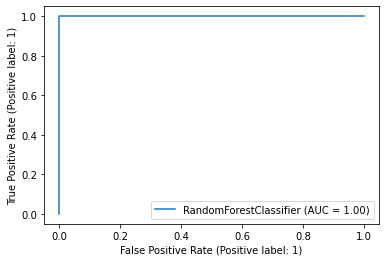

In [55]:
plot_roc_curve(estimator=rf,X=X_train,y=y_train)
plt.show()

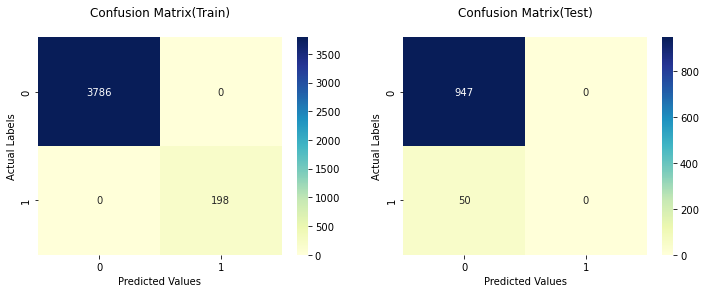

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,rf.predict(X_train)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)\n")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Test)\n")
plt.show()

We need to focus on the FN(false-negatives) i.e., Actual stroke labels predicted as No stroke.

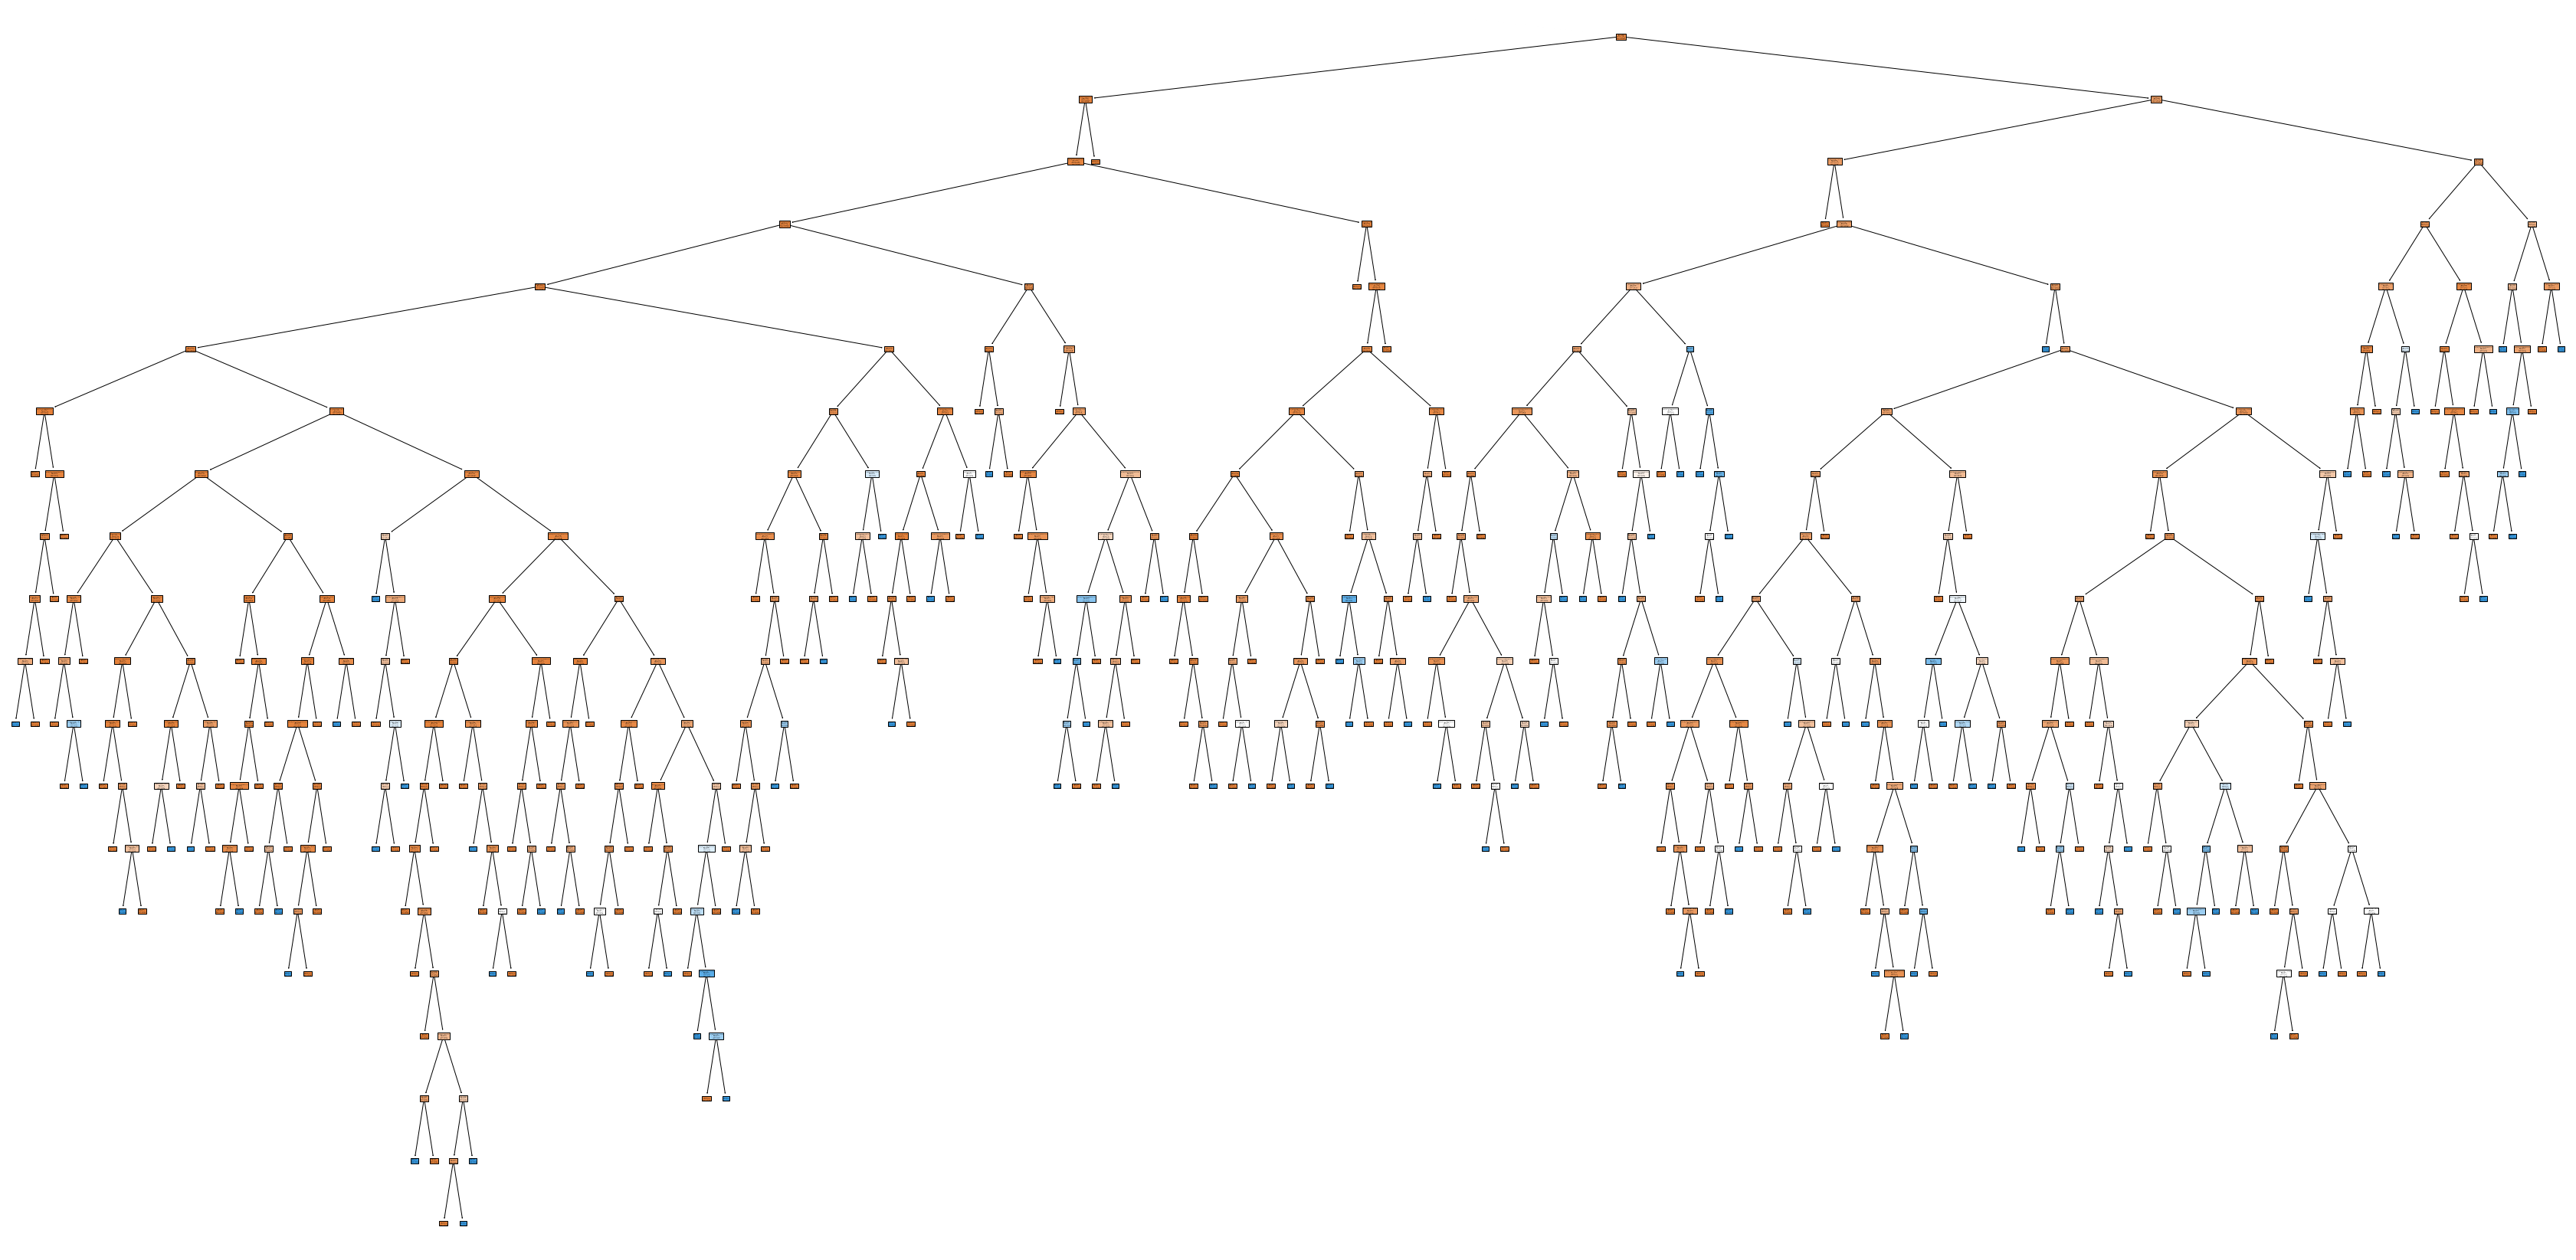

In [57]:
# let's look in to the sample tree :
sampletree=rf.estimators_[4]
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(sampletree, feature_names = X.columns,
          class_names=['Nostroke','Stroke'],filled=True);

Let's apply cross validation scheme based on the ROCAUC score :

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
cross_val_score(estimator=rf,X=X_train,y=y_train,cv=5,scoring="roc_auc",n_jobs=-1)

array([0.77276571, 0.79468296, 0.78832563, 0.77755945, 0.79841141])

We see that our Basic model is somewhat stable of approx 0.78 ROCAUC.

Let's do Feature selection based on RFECV on ROCAUC score :

In [60]:
from sklearn.feature_selection import RFECV
rfe_acc=RFECV(estimator=rf,cv=4,n_jobs=-1)
rfe_roc=RFECV(estimator=rf,cv=4,scoring='roc_auc',n_jobs=-1)
rfe_prec=RFECV(estimator=rf,cv=4,scoring='precision_macro',n_jobs=-1)
rfe_recall=RFECV(estimator=rf,cv=4,scoring='recall_macro',n_jobs=-1)

In [61]:
%%time
rfe_acc.fit(X_train,y_train)

Wall time: 8.1 s


RFECV(cv=4, estimator=RandomForestClassifier(oob_score=True, random_state=42),
      n_jobs=-1)

In [62]:
%%time
rfe_roc.fit(X_train,y_train)

Wall time: 9.44 s


RFECV(cv=4, estimator=RandomForestClassifier(oob_score=True, random_state=42),
      n_jobs=-1, scoring='roc_auc')

In [63]:
%%time
rfe_prec.fit(X_train,y_train)

Wall time: 10.4 s


RFECV(cv=4, estimator=RandomForestClassifier(oob_score=True, random_state=42),
      n_jobs=-1, scoring='precision_macro')

In [64]:
%%time
rfe_recall.fit(X_train,y_train)

Wall time: 10.9 s


RFECV(cv=4, estimator=RandomForestClassifier(oob_score=True, random_state=42),
      n_jobs=-1, scoring='recall_macro')

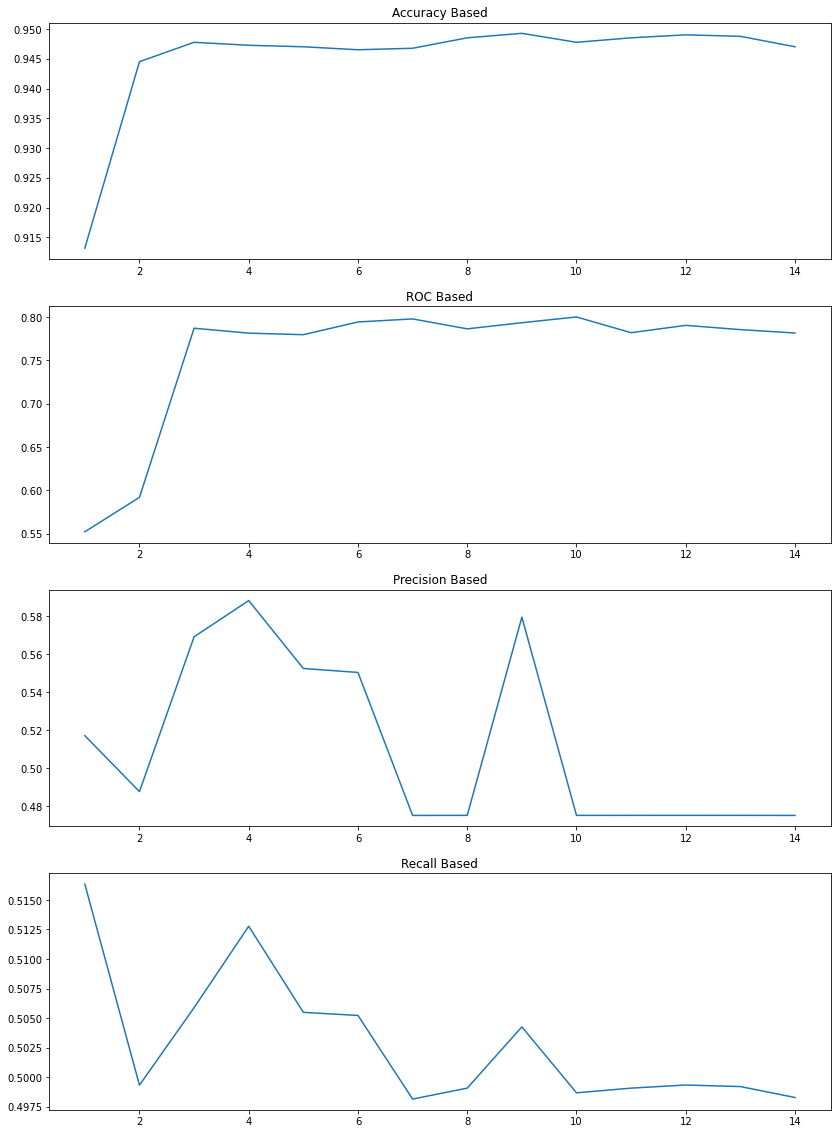

In [65]:
plt.figure(figsize=(14,20))
plt.subplot(4,1,1)
plt.plot(range(1,X_train.shape[1]+1),rfe_acc.grid_scores_)
plt.title("Accuracy Based")

plt.subplot(4,1,2)
plt.plot(range(1,X_train.shape[1]+1),rfe_roc.grid_scores_)
plt.title("ROC Based")

plt.subplot(4,1,3)
plt.plot(range(1,X_train.shape[1]+1),rfe_prec.grid_scores_)
plt.title("Precision Based")

plt.subplot(4,1,4)
plt.plot(range(1,X_train.shape[1]+1),rfe_recall.grid_scores_)
plt.title("Recall Based")

plt.show()

Now we will select 9 No of Features.

In [66]:
from sklearn.feature_selection import RFE
rfe1=RFE(estimator=rf,n_features_to_select=9)

In [67]:
%%time
rfe1.fit(X_train,y_train)

Wall time: 1.71 s


RFE(estimator=RandomForestClassifier(oob_score=True, random_state=42),
    n_features_to_select=9)

In [68]:
cols=X_train.columns[rfe1.support_]
cols

Index(['gender', 'age', 'hypertension', 'Residence_type', 'avg_glucose_level',
       'bmi', 'work_type_Private', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked'],
      dtype='object')

In [69]:
#let's build a model for the selected Features :
X_trainftr=X_train[cols]
rf.fit(X_trainftr,y_train)
print("Training Accuracy :",rf.score(X_trainftr,y_train))
print("OOB Score         :",rf.oob_score_)

Training Accuracy : 1.0
OOB Score         : 0.9470381526104418


In [70]:
# Let's see the cross Validation based on ROC :
cross_val_score(estimator=rf,X=X_trainftr,y=y_train,cv=5,scoring="roc_auc",n_jobs=-1)

array([0.78844462, 0.79405548, 0.79410502, 0.78989432, 0.81377231])

In [71]:
#let's see on Test set :
X_testftr=X_test[cols]
print("Test Accuracy :",accuracy_score(y_test,rf.predict(X_testftr)))

Test Accuracy : 0.9498495486459378


We see that there is not much difference is observed in the Accuracies for both the Sets before and after Feature selection.

Upto now we done without Hyper-parameter Tuning, so Let's do Hyper-parameter Tuning.

Let's do Hyper-parameter Tuning using RandomisedSearchCv

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
params= {'n_estimators' : range(50,200,10),
        'criterion' : ['gini','entropy'],
         'max_depth' : range(4,11,1),
         'min_samples_split' : range(3,14,1),
         'min_samples_leaf'  : range(2,12,1),
        'max_features':["sqrt","log2",'None']  
        }

In [74]:
rcv=RandomizedSearchCV(estimator=rf,param_distributions=params,verbose=1,
                       cv=5,return_train_score=True,n_jobs=-1,n_iter=50,scoring='roc_auc')

In [75]:
%%time
rcv.fit(X_trainftr,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 25.4 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(4, 11),
                                        'max_features': ['sqrt', 'log2',
                                                         'None'],
                                        'min_samples_leaf': range(2, 12),
                                        'min_samples_split': range(3, 14),
                                        'n_estimators': range(50, 200, 10)},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [76]:
cvdf=pd.DataFrame(rcv.cv_results_)
cvdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068000,0.002756,0.0000,0.00000,120,9,9,None,8,entropy,"{'n_estimators': 120, 'min_samples_split': 9, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.221599,0.005571,0.0134,0.00049,60,10,2,log2,6,gini,"{'n_estimators': 60, 'min_samples_split': 10, ...",0.818449,0.842041,0.835271,0.803897,0.847272,0.829386,0.016025,20,0.933395,0.936145,0.936309,0.943107,0.936341,0.937059,0.003222
2,0.300199,0.009621,0.0164,0.00049,70,5,9,sqrt,9,entropy,"{'n_estimators': 70, 'min_samples_split': 5, '...",0.822069,0.845740,0.832794,0.811658,0.845036,0.831459,0.013193,6,0.953952,0.956010,0.955232,0.961449,0.952424,0.955813,0.003069
3,0.046200,0.000980,0.0000,0.00000,80,8,5,None,9,gini,"{'n_estimators': 80, 'min_samples_split': 8, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.040999,0.001789,0.0000,0.00000,70,13,6,None,10,entropy,"{'n_estimators': 70, 'min_samples_split': 13, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
slctcols=['param_n_estimators','param_min_samples_split','param_min_samples_leaf','param_max_features',
          'param_max_depth','param_criterion','mean_test_score','mean_train_score','rank_test_score']
cvdf=cvdf[slctcols]
cvdf.head()

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,mean_test_score,mean_train_score,rank_test_score
0,120,9,9,None,8,entropy,NaN,NaN,35
1,60,10,2,log2,6,gini,0.829386,0.937059,20
2,70,5,9,sqrt,9,entropy,0.831459,0.955813,6
3,80,8,5,None,9,gini,NaN,NaN,48
4,70,13,6,None,10,entropy,NaN,NaN,47


In [78]:
cvdf.sort_values(by='rank_test_score').head(20)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,mean_test_score,mean_train_score,rank_test_score
41,180,7,11,log2,6,entropy,0.833863,0.920350,1
13,140,9,10,log2,6,entropy,0.833393,0.921427,2
22,180,13,6,sqrt,6,entropy,0.833262,0.930894,3
7,110,10,5,sqrt,5,entropy,0.832259,0.909353,4
30,140,9,11,log2,7,gini,0.831648,0.931868,5
2,70,5,9,sqrt,9,entropy,0.831459,0.955813,6
9,190,5,10,sqrt,10,entropy,0.831163,0.958318,7
8,160,7,8,sqrt,4,gini,0.831120,0.881399,8
20,160,13,9,log2,7,gini,0.830902,0.937421,9
26,110,10,5,log2,4,gini,0.830612,0.882943,10


In [79]:
cvdf.isnull().sum()

param_n_estimators          0
param_min_samples_split     0
param_min_samples_leaf      0
param_max_features          0
param_max_depth             0
param_criterion             0
mean_test_score            20
mean_train_score           20
rank_test_score             0
dtype: int64

In [80]:
nest=cvdf.groupby(by='param_n_estimators').mean()
nest=nest.reset_index()
nest

,param_n_estimators,mean_test_score,mean_train_score,rank_test_score
0,50,NaN,NaN,32.000000
1,60,0.829870,0.920118,27.000000
2,70,0.831459,0.955813,33.000000
3,80,0.828683,0.962795,36.333333
4,90,0.826596,0.975788,26.000000
5,100,0.830159,0.966058,32.500000
6,110,0.827400,0.948270,17.400000
7,120,NaN,NaN,35.000000
8,130,0.828215,0.981777,25.666667
9,140,0.831108,0.913146,16.166667


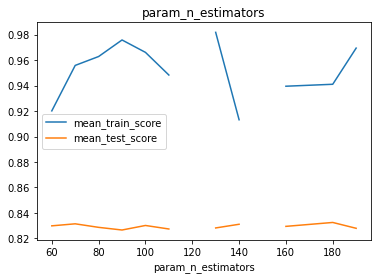

In [81]:
nest.plot.line(x='param_n_estimators',y=['mean_train_score','mean_test_score'])
plt.title("param_n_estimators")
plt.show()

We see that Mean_Train_score is fluctuating but the Mean_Test_score is around (82%,83%),we will look n_estimators around (80,100) with interval of 5

In [82]:
dpth=cvdf.groupby('param_max_depth').mean()
dpth=dpth.reset_index()
dpth

,param_max_depth,mean_test_score,mean_train_score,rank_test_score
0,4,0.830666,0.882027,22.000000
1,5,0.830846,0.904508,24.666667
2,6,0.831585,0.926348,20.333333
3,7,0.830902,0.940615,22.200000
4,8,0.828851,0.966889,32.600000
5,9,0.827086,0.973455,28.454545
6,10,0.828060,0.976380,27.333333


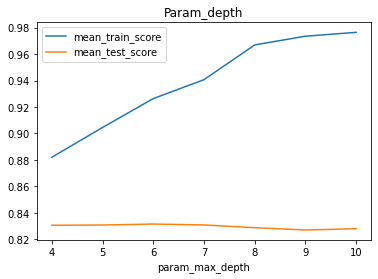

In [83]:
dpth.plot.line(x='param_max_depth',y=['mean_train_score','mean_test_score'])
plt.title("Param_depth")
plt.show()

We see that Mean-Test-Scores are somewhat stable fall in to the (83% approx) but for Mean-Train-Scores it is increasing up to 9 and starts decreasing at 10 so we need to look between (8,12).

In [84]:
minlf=cvdf.groupby('param_min_samples_leaf').mean()
minlf=minlf.reset_index()
minlf

,param_min_samples_leaf,mean_test_score,mean_train_score,rank_test_score
0,2,0.824414,0.973310,26.333333
1,3,NaN,NaN,43.500000
2,4,0.826265,0.978575,34.500000
3,5,0.829028,0.948149,21.857143
4,6,0.831083,0.941087,22.600000
5,7,0.830032,0.941954,20.000000
6,8,0.831120,0.881399,34.600000
7,9,0.831181,0.946617,24.833333
8,10,0.831494,0.926913,24.333333
9,11,0.831603,0.923625,9.000000


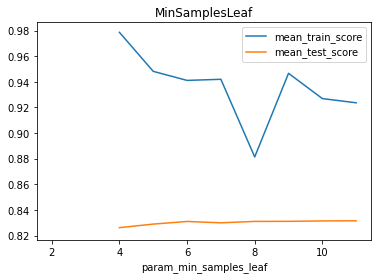

In [85]:
minlf.plot.line(x='param_min_samples_leaf',y=['mean_train_score','mean_test_score'])
plt.title("MinSamplesLeaf")
plt.show()

We will look for MinSamplesLeaf around (4,7)

In [86]:
mnsplit=cvdf.groupby('param_min_samples_split').mean()
mnsplit=mnsplit.reset_index()
mnsplit

,param_min_samples_split,mean_test_score,mean_train_score,rank_test_score
0,3,NaN,NaN,39.666667
1,4,0.828947,0.972223,29.500000
2,5,0.826871,0.971585,20.200000
3,6,0.827261,0.947153,28.000000
4,7,0.831110,0.921616,20.833333
5,8,0.828442,0.968272,29.000000
6,9,0.830240,0.941436,21.000000
7,10,0.829625,0.919049,24.857143
8,11,NaN,NaN,46.000000
9,12,0.830290,0.947941,21.000000


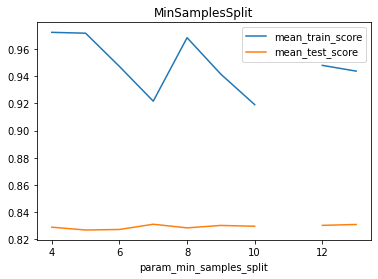

In [87]:
mnsplit.plot.line(x='param_min_samples_split',y=['mean_train_score','mean_test_score'])
plt.title("MinSamplesSplit")
plt.show()

we look for MinSamplesSplit around (8,11)

Let's do Fine Tuning using RandomisedSearchCv :

In [88]:
params= {'n_estimators' : range(80,105,5),
        'criterion' : ['gini','entropy'],
         'max_depth' : range(8,13,1),
        'min_samples_split' : range(8,13,1),
         'min_samples_leaf'  : range(4,8,1),
        'max_features':["sqrt","log2",'None']  
             }

In [89]:
rcv1=RandomizedSearchCV(estimator=rf,param_distributions=params,
                       verbose=1,n_jobs=-1,n_iter=50,scoring='roc_auc',return_train_score=True,cv=4)

In [90]:
%%time
rcv1.fit(X_trainftr,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 16.7 s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(8, 13),
                                        'max_features': ['sqrt', 'log2',
                                                         'None'],
                                        'min_samples_leaf': range(4, 8),
                                        'min_samples_split': range(8, 13),
                                        'n_estimators': range(80, 105, 5)},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [91]:
cvdf=pd.DataFrame(rcv1.cv_results_)
cvdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.051499,0.004500,0.00000,0.00000,85,8,7,None,12,gini,"{'n_estimators': 85, 'min_samples_split': 8, '...",NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN
1,0.435749,0.006796,0.02475,0.00192,100,11,4,log2,9,entropy,"{'n_estimators': 100, 'min_samples_split': 11,...",0.816413,0.845441,0.790560,0.858520,0.827734,0.026322,7,0.978157,0.979930,0.982283,0.978302,0.979668,0.001662
2,0.334999,0.011291,0.02050,0.00050,85,11,6,log2,9,gini,"{'n_estimators': 85, 'min_samples_split': 11, ...",0.810109,0.840161,0.789059,0.853467,0.823199,0.025203,22,0.967845,0.967776,0.973235,0.966378,0.968808,0.002622
3,0.047750,0.001090,0.00000,0.00000,85,10,7,None,9,entropy,"{'n_estimators': 85, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN
4,0.049750,0.001479,0.00000,0.00000,90,11,5,None,11,entropy,"{'n_estimators': 90, 'min_samples_split': 11, ...",NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
slctcols=['param_n_estimators','param_min_samples_split','param_min_samples_leaf','param_max_features',
          'param_max_depth','param_criterion','mean_test_score','mean_train_score','rank_test_score']
cvdf=cvdf[slctcols]
cvdf.head()

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,mean_test_score,mean_train_score,rank_test_score
0,85,8,7,None,12,gini,NaN,NaN,37
1,100,11,4,log2,9,entropy,0.827734,0.979668,7
2,85,11,6,log2,9,gini,0.823199,0.968808,22
3,85,10,7,None,9,entropy,NaN,NaN,48
4,90,11,5,None,11,entropy,NaN,NaN,47


In [93]:
cvdf.sort_values(by='rank_test_score').head(20)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,mean_test_score,mean_train_score,rank_test_score
42,100,9,6,log2,9,entropy,0.830360,0.971057,1
16,80,8,7,sqrt,12,entropy,0.830213,0.974896,2
29,95,10,6,sqrt,9,entropy,0.829871,0.970971,3
14,100,8,7,log2,9,entropy,0.829811,0.965781,4
8,85,11,7,sqrt,12,entropy,0.829530,0.975071,5
10,90,12,7,log2,12,entropy,0.829392,0.975076,6
1,100,11,4,log2,9,entropy,0.827734,0.979668,7
48,90,8,6,sqrt,8,gini,0.827195,0.960828,8
27,90,12,5,log2,8,gini,0.827117,0.964507,9
7,95,12,7,log2,8,gini,0.826791,0.956493,10


In [94]:
rf1=rcv1.best_estimator_
rf1

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=6, min_samples_split=9, oob_score=True,
                       random_state=42)

In [95]:
rfmdl=rf1.fit(X_trainftr,y_train)
print("Training Accuracy :",rfmdl.score(X_trainftr,y_train))
print('Out of Bag Error :',rfmdl.oob_score_)

Training Accuracy : 0.9503012048192772
Out of Bag Error : 0.9503012048192772


In [96]:
print("Test Accuracy :",accuracy_score(y_test,rfmdl.predict(X_testftr)))

Test Accuracy : 0.9498495486459378


In [97]:
# Let's apply cross validation scheme based on Roc :
cross_val_score(estimator=rf1,X=X_trainftr,y=y_train,cv=5,scoring='roc_auc',n_jobs=-1)

array([0.8255869 , 0.84190885, 0.82057464, 0.80437583, 0.8417505 ])

In [98]:
# Let's apply cross validation scheme based on accuracy :
cross_val_score(estimator=rf1,X=X_trainftr,y=y_train,cv=5,n_jobs=-1)

array([0.9510665 , 0.94981179, 0.94981179, 0.94981179, 0.95100503])

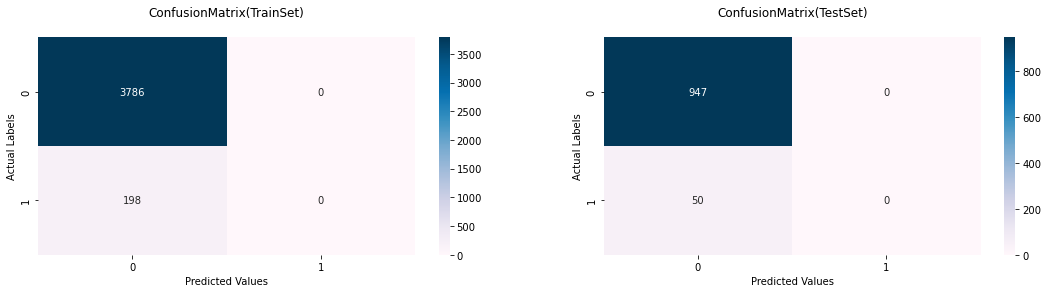

In [99]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,rfmdl.predict(X_trainftr)),cmap='PuBu',fmt='d',annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Labels')
plt.title("ConfusionMatrix(TrainSet)\n")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,rfmdl.predict(X_testftr)),cmap='PuBu',fmt='d',annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Labels')
plt.title("ConfusionMatrix(TestSet)\n")

plt.subplots_adjust(right=2,left=0.8)
plt.show()

We can see that the Model is only predicting only 0's still we get 95% accuracy but this model is not good because the model is predicting Actual stroke cases are predicted as they are not having any stroke so this is a serious issue.

This happened because the Train Data set we considered is Highly imbalanced,(95% 0's , 5% 1's) so we need to apply sampling techniques.

### UnderSampling :

In [100]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)

In [101]:
X_rus,y_rus=rus.fit_resample(X_trainftr,y_train)
print("X_rus shape :",X_rus.shape)
print("y_rus shape :",y_rus.shape)

X_rus shape : (396, 9)
y_rus shape : (396,)


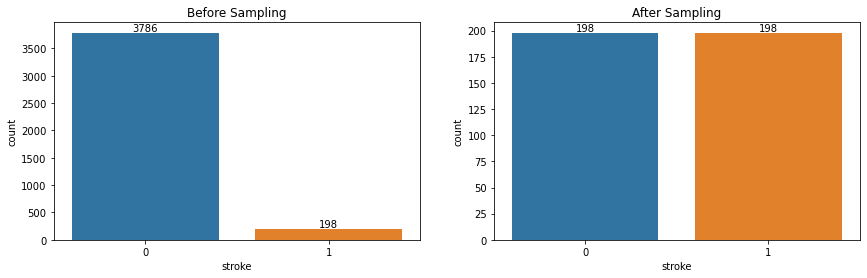

In [102]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
fig=sns.countplot(y_train)
ax_labels=y_train.value_counts().values
fig.bar_label(fig.containers[0],labels=ax_labels)
plt.title("Before Sampling")

plt.subplot(1,2,2)
fig=sns.countplot(y_rus)
ax_labels=y_rus.value_counts().values
fig.bar_label(fig.containers[0],labels=ax_labels)
plt.title("After Sampling")

plt.subplots_adjust(right=1.6,left=0.2)
plt.show()

As we can see that the Random Under Sampling technique randomly selects the Majority class observations equal to the observations of Minority class.

One of the drawback of this sampling is we will lose the Information.

In [103]:
# Let's apply the Model to the Undersampled Data :
rfrus=rfmdl.fit(X_rus,y_rus)
print("Training set Accuracy :",rfrus.score(X_rus,y_rus))
print("Out of Bag Error      :",rfrus.oob_score_)

Training set Accuracy : 0.8459595959595959
Out of Bag Error      : 0.7878787878787878


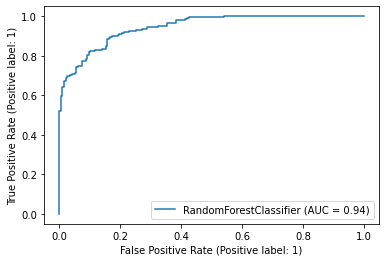

In [104]:
#let's see the roc-score :
plot_roc_curve(estimator=rfrus,X=X_rus,y=y_rus)
plt.show()

We can see that the Roc-Auc is 93% which is some what better rather than overfitting.

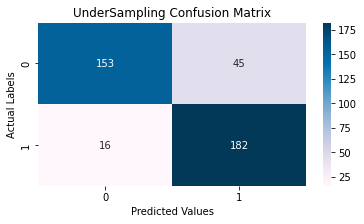

In [105]:
# let's see the confusion-matrix :
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_rus,rfrus.predict(X_rus)),annot=True,cmap='PuBu',fmt='d')
plt.title("UnderSampling Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.show()

In [106]:
# let's see the Classification Report :
print(classification_report(y_rus,rfrus.predict(X_rus)))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       198
           1       0.80      0.92      0.86       198

    accuracy                           0.85       396
   macro avg       0.85      0.85      0.85       396
weighted avg       0.85      0.85      0.85       396



In [107]:
# Let's apply cross-validation : Accuracy
cross_val_score(estimator=rfrus,X=X_rus,y=y_rus,cv=4)

array([0.76767677, 0.78787879, 0.75757576, 0.81818182])

In [108]:
# Let's apply cross-validation : ROC
cross_val_score(estimator=rfrus,X=X_rus,y=y_rus,cv=4,scoring='roc_auc')

array([0.81918367, 0.83591837, 0.75591837, 0.85795918])

In [109]:
# cross-validation : precision
cross_val_score(estimator=rfrus,X=X_rus,y=y_rus,cv=4,scoring='precision')

array([0.72413793, 0.73333333, 0.74074074, 0.75806452])

In [110]:
# cross-validation : Recall
cross_val_score(estimator=rfrus,X=X_rus,y=y_rus,cv=4,scoring='recall')

array([0.85714286, 0.89795918, 0.8       , 0.94      ])

In [111]:
# Now let's see on the final Test :
print("Test Set Accuracy :",accuracy_score(y_test,rfrus.predict(X_testftr)))

Test Set Accuracy : 0.7001003009027081


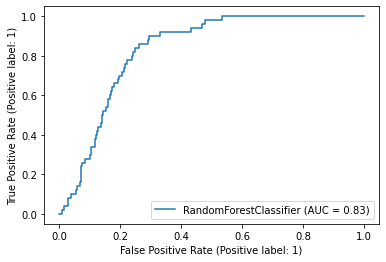

In [112]:
#let's see the roc-score : Test Set
plot_roc_curve(estimator=rfrus,X=X_testftr,y=y_test)
plt.show()

In [113]:
# let's see the Classification Report : Test Set
print(classification_report(y_test,rfrus.predict(X_testftr)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       947
           1       0.13      0.90      0.23        50

    accuracy                           0.70       997
   macro avg       0.56      0.79      0.52       997
weighted avg       0.95      0.70      0.78       997



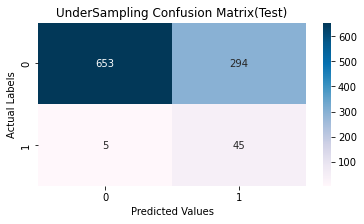

In [114]:
# let's see the confusion-matrix :
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,rfrus.predict(X_testftr)),annot=True,cmap='PuBu',fmt='d')
plt.title("UnderSampling Confusion Matrix(Test)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.show()

In [115]:
print("Precision :",46/(46+292))
print('Recall    :',46/(46+4))
print("FNR       :",4/(46+4))
print("FPR       :",292/(292+655))

Precision : 0.13609467455621302
Recall    : 0.92
FNR       : 0.08
FPR       : 0.30834213305174235


As we can see that the False Negative Rate is lower but we are having high False Positive Rate. It is good to have low FN value 
i.e., Identifying the Actual stroked persons as Non-Stroked persons but at the same time we are having high FP value i.e., Identifying the Actual Non-stroked persons as Stroked Persons so we are giving medications to the non-patients.

Let's see OverSampling :

### OverSampling :

In [116]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [117]:
X_ros,y_ros=ros.fit_resample(X_trainftr,y_train)
print("X_ros shape :",X_ros.shape)
print("y_ros shape :",y_ros.shape)

X_ros shape : (7572, 9)
y_ros shape : (7572,)


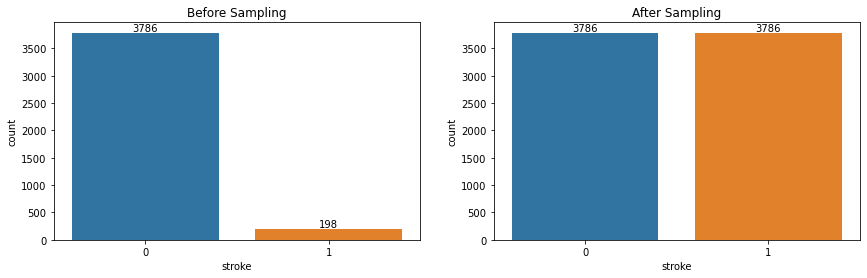

In [118]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
fig=sns.countplot(y_train)
ax_labels=y_train.value_counts().values
fig.bar_label(fig.containers[0],labels=ax_labels)
plt.title("Before Sampling")

plt.subplot(1,2,2)
fig=sns.countplot(y_ros)
ax_labels=y_ros.value_counts().values
fig.bar_label(fig.containers[0],labels=ax_labels)
plt.title("After Sampling")

plt.subplots_adjust(right=1.6,left=0.2)
plt.show()

As we can see that the Random Over Sampling technique duplicates the Minority class observations equal to the observations of Majority class.

One of the drawback of this sampling technique is it tends to be overfitting because of the duplication of Minority Class.

In [119]:
# Let's apply the Model to the oversampled Data :
rfros=rfmdl.fit(X_ros,y_ros)
print("Training set Accuracy :",rfros.score(X_ros,y_ros))
print("Out of Bag Error      :",rfros.oob_score_)

Training set Accuracy : 0.9376650818806128
Out of Bag Error      : 0.9244585314315901


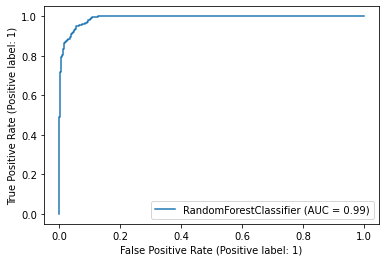

In [120]:
#let's see the roc-score :
plot_roc_curve(estimator=rfros,X=X_ros,y=y_ros)
plt.show()

We can see that the Roc-Auc is 98% which is nice but we will check it by cross validation.

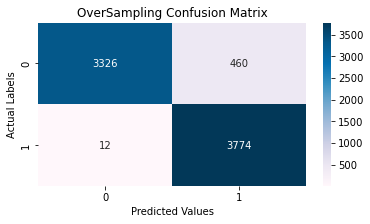

In [121]:
# let's see the confusion-matrix :
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_ros,rfros.predict(X_ros)),annot=True,cmap='PuBu',fmt='d')
plt.title("OverSampling Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.show()

In [122]:
# let's see the Classification Report :
print(classification_report(y_ros,rfros.predict(X_ros)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3786
           1       0.89      1.00      0.94      3786

    accuracy                           0.94      7572
   macro avg       0.94      0.94      0.94      7572
weighted avg       0.94      0.94      0.94      7572



In [123]:
# Let's apply cross-validation : Accuracy
cross_val_score(estimator=rfros,X=X_ros,y=y_ros,cv=4)

array([0.92128896, 0.90702588, 0.91917591, 0.92498679])

In [124]:
# Let's apply cross-validation : ROC
cross_val_score(estimator=rfros,X=X_ros,y=y_ros,cv=4,scoring='roc_auc')

array([0.98393614, 0.97511224, 0.98142794, 0.97850897])

In [125]:
# cross-validation : precision
cross_val_score(estimator=rfros,X=X_ros,y=y_ros,cv=4,scoring='precision')

array([0.86932345, 0.85516605, 0.86488971, 0.87303058])

In [126]:
# cross-validation : Recall
cross_val_score(estimator=rfros,X=X_ros,y=y_ros,cv=4,scoring='recall')

array([0.99154334, 0.97991543, 0.9936642 , 0.99472017])

In [127]:
# Now let's see on the final Test :
print("Test Set Accuracy :",accuracy_score(y_test,rfros.predict(X_testftr)))

Test Set Accuracy : 0.831494483450351


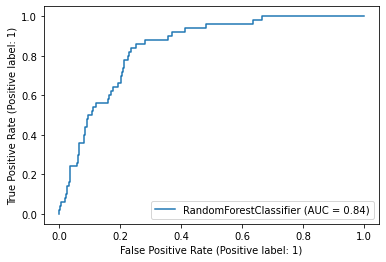

In [128]:
#let's see the roc-score :Test set
plot_roc_curve(estimator=rfros,X=X_testftr,y=y_test)
plt.show()

In [129]:
# let's see the Classification Report : Test Set
print(classification_report(y_test,rfros.predict(X_testftr)))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       947
           1       0.16      0.56      0.25        50

    accuracy                           0.83       997
   macro avg       0.57      0.70      0.58       997
weighted avg       0.93      0.83      0.87       997



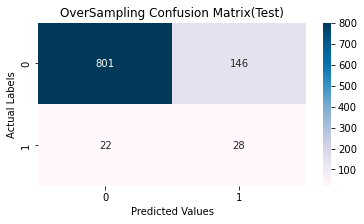

In [130]:
# let's see the confusion-matrix :
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,rfros.predict(X_testftr)),annot=True,cmap='PuBu',fmt='d')
plt.title("OverSampling Confusion Matrix(Test)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.show()

In [131]:
print("Precision :",30/(30+163))
print('Recall    :',30/50)
print("FNR       :",20/50)
print("FPR       :",163/(163+784))

Precision : 0.15544041450777202
Recall    : 0.6
FNR       : 0.4
FPR       : 0.17212249208025343


As we can see that the False Negative value  is high compared to UnderSampling Model i.e., Identifying the Actual stroked persons as Non-Stroked persons , at the same time we are also having low FP value compared to UnderSampling Model i.e., Identifying the Actual Non-stroked persons as Stroked Persons.
In this Model we need to see the methods to reduce the FN value.

Let's see SMOTE :

### SMOTE : Synthetic Minority Oversampling Technique

SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [132]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

In [133]:
X_smote,y_smote=smote.fit_resample(X_trainftr,y_train)
print("X_smote shape :",X_smote.shape)
print("y_smote shape :",y_smote.shape)

X_smote shape : (7572, 9)
y_smote shape : (7572,)


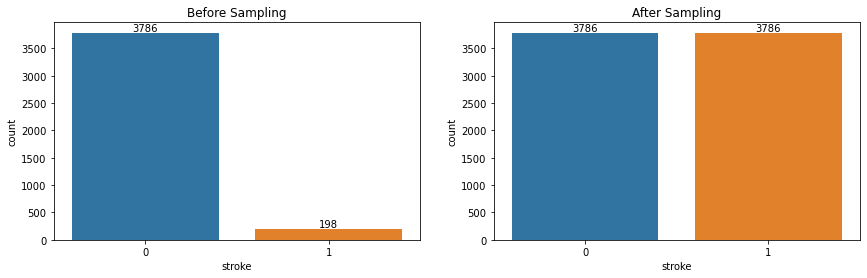

In [134]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
fig=sns.countplot(y_train)
ax_labels=y_train.value_counts().values
fig.bar_label(fig.containers[0],labels=ax_labels)
plt.title("Before Sampling")

plt.subplot(1,2,2)
fig=sns.countplot(y_smote)
ax_labels=y_smote.value_counts().values
fig.bar_label(fig.containers[0],labels=ax_labels)
plt.title("After Sampling")

plt.subplots_adjust(right=1.6,left=0.2)
plt.show()

In [135]:
# Let's apply the Model to the oversampled Data :
rfsmt=rfmdl.fit(X_smote,y_smote)
print("Training set Accuracy :",rfsmt.score(X_smote,y_smote))
print("Out of Bag Error      :",rfsmt.oob_score_)

Training set Accuracy : 0.9194400422609614
Out of Bag Error      : 0.8968568409931326


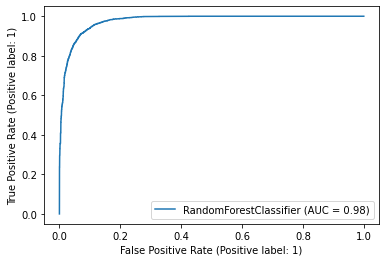

In [136]:
#let's see the roc-score :
plot_roc_curve(estimator=rfsmt,X=X_smote,y=y_smote)
plt.show()

We can see that the Roc-Auc is 97% which is nice but we will check it by cross validation.

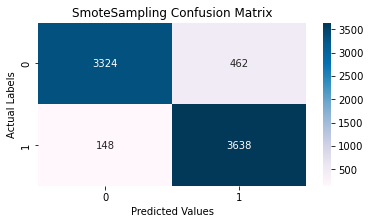

In [137]:
# let's see the confusion-matrix :
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_smote,rfsmt.predict(X_smote)),annot=True,cmap='PuBu',fmt='d')
plt.title("SmoteSampling Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.show()

In [138]:
# let's see the Classification Report :
print(classification_report(y_smote,rfsmt.predict(X_smote)))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3786
           1       0.89      0.96      0.92      3786

    accuracy                           0.92      7572
   macro avg       0.92      0.92      0.92      7572
weighted avg       0.92      0.92      0.92      7572



In [139]:
# Let's apply cross-validation : Accuracy
cross_val_score(estimator=rfsmt,X=X_smote,y=y_smote,cv=4)

array([0.86740623, 0.89804543, 0.89276281, 0.90438457])

In [140]:
# Let's apply cross-validation : Roc
cross_val_score(estimator=rfsmt,X=X_smote,y=y_smote,cv=4,scoring='roc_auc')

array([0.9457595 , 0.96335708, 0.96317736, 0.96412394])

In [141]:
# Let's apply cross-validation : precision
cross_val_score(estimator=rfsmt,X=X_smote,y=y_smote,cv=4,scoring='precision')

array([0.85714286, 0.85552408, 0.85160681, 0.8647619 ])

In [142]:
# Let's apply cross-validation : Recall
cross_val_score(estimator=rfsmt,X=X_smote,y=y_smote,cv=4,scoring='recall')

array([0.88160677, 0.9577167 , 0.95142555, 0.95881732])

In [143]:
# Now let's see on the final Test :
print("Test Set Accuracy :",accuracy_score(y_test,rfsmt.predict(X_testftr)))

Test Set Accuracy : 0.831494483450351


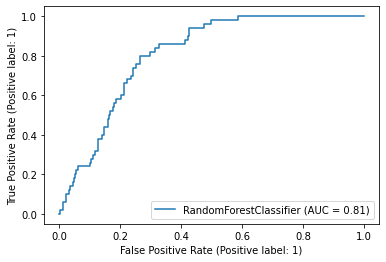

In [144]:
#let's see the roc-score :Test set
plot_roc_curve(estimator=rfsmt,X=X_testftr,y=y_test)
plt.show()

In [145]:
# let's see the Classification Report : Test Set
print(classification_report(y_test,rfsmt.predict(X_testftr)))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       947
           1       0.14      0.44      0.21        50

    accuracy                           0.83       997
   macro avg       0.55      0.65      0.56       997
weighted avg       0.92      0.83      0.87       997



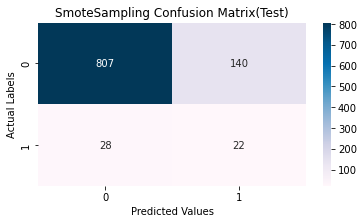

In [146]:
# let's see the confusion-matrix :
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,rfsmt.predict(X_testftr)),annot=True,cmap='PuBu',fmt='d')
plt.title("SmoteSampling Confusion Matrix(Test)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.show()

As we can see that the False Negative value is high compared to OverSampling Model i.e., Identifying the Actual stroked persons as Non-Stroked persons , at the same time we are also having low FP value compared to UnderSampling Model i.e., Identifying the Actual Non-stroked persons as Stroked Persons. In this Model we need to see the methods to reduce the FN value.

Note that Upto Now the class labels are predicted using 0.5 as the Threshold value ,in order to find the Optimum value of the Threshold value we can use the Sensitivity-Specificity Tradeoff or Precision-Recall Tradeoff.

Also, we can start the entire process i.e., Feature selection , Hyper-parameter tuning after the Sampling and select the Model which is appropriate.

      --------------------------------------------------------------------------------------------------------

### Conclusion :
* Feature selection is done using Recursive Feature Elimination Cross Validation.
* Cross validation scheme is used to check whether the Model is stable or not.
* Hyper-parameter tuning is done using Randomised Search CV.
* After doing Coarse tuning Fine tuning is done based on analysis of individual Hyper-parameter.
* Sampling Techniques like UnderSampling,OverSampling,SMOTE Techniques for Imbalanced Data is used.